In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

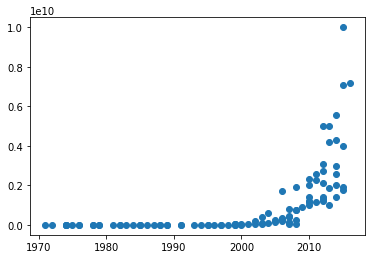

In [6]:
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

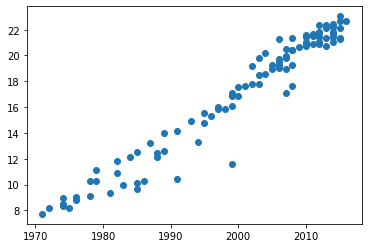

In [7]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [8]:
# copied from lr_1d.py
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

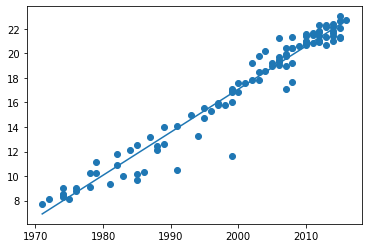

In [9]:
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [10]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

a: 0.35104357336499337 b: -685.0002843816548
the r-squared is: 0.9529442852285758
